<a href="https://colab.research.google.com/github/Dei-gratia/Machine-Learning-Projects/blob/main/ML%20course%20with%20Python/MNIST_Handwritten_Digit_Classification_Using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [36]:
#load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [37]:
type(X_train)

numpy.ndarray

In [38]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [39]:
#print an image from the dataset
print(X_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

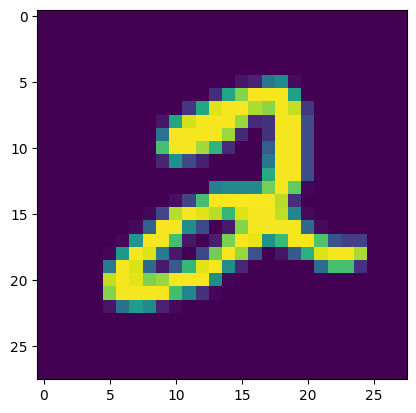

2


In [40]:
#display the image
plt.imshow(X_train[5])
plt.show()

#print the image label
print(y_train[5])

In [41]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [42]:
# check unique values in y_train and y_test
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [43]:
#scale the images
X_train = X_train/255
X_test = X_test/255

print(X_train[5])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [44]:
#building the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu" ),
    keras.layers.Dense(10, activation="sigmoid")
])

#compile the Neural Network
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [45]:
#train the Neural Network
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2930 - accuracy: 0.9150
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1399 - accuracy: 0.9584
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1041 - accuracy: 0.9679
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0844 - accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0703 - accuracy: 0.9781
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0600 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9834
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0453 - accuracy: 0.9856
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0414 - accuracy: 0.9868
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.034

In [46]:
#check accuracy on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0997 - accuracy: 0.9741
0.9740999937057495


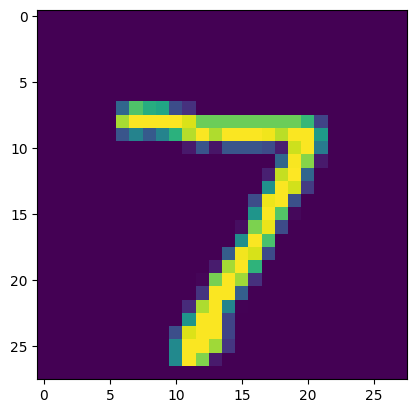

7


In [47]:
plt.imshow(X_test[0])
plt.show()
print(y_test[0])

In [48]:
#use the model for prediction
y_pred = model.predict(X_test)
print(y_pred[0])

313/313 [==============================] - 1s 2ms/step
[3.0269860e-03 1.9254559e-04 2.9963323e-01 8.6030549e-01 1.4698535e-06
 2.1867634e-05 3.6918466e-09 9.9999565e-01 5.4442580e-04 7.2134054e-01]


In [49]:
#convert prediction probabilities to class label
predicted_label = np.argmax(y_pred[0])
print(predicted_label)

7


In [50]:
#convert prediction probabilities to class label for all test data points
predicted_labels = [np.argmax(i) for i in y_pred]
print(predicted_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [51]:
#confusion matrics
conf_mat = confusion_matrix(y_test, predicted_labels)
print(conf_mat)

tf.Tensor(
[[ 969    0    0    0    1    4    0    2    4    0]
 [   0 1120    4    1    0    3    2    2    3    0]
 [   5    3  998    5    3    0    4    5    9    0]
 [   1    0    3  971    0   20    0    5    6    4]
 [   1    0    1    1  962    1    5    2    1    8]
 [   3    0    0    7    1  867    4    3    5    2]
 [   4    2    1    1    3   13  934    0    0    0]
 [   1    4    7    2    1    1    0  999    1   12]
 [   6    0    3    4    3    9    1    2  944    2]
 [   3    3    0    1    8    7    1    5    4  977]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

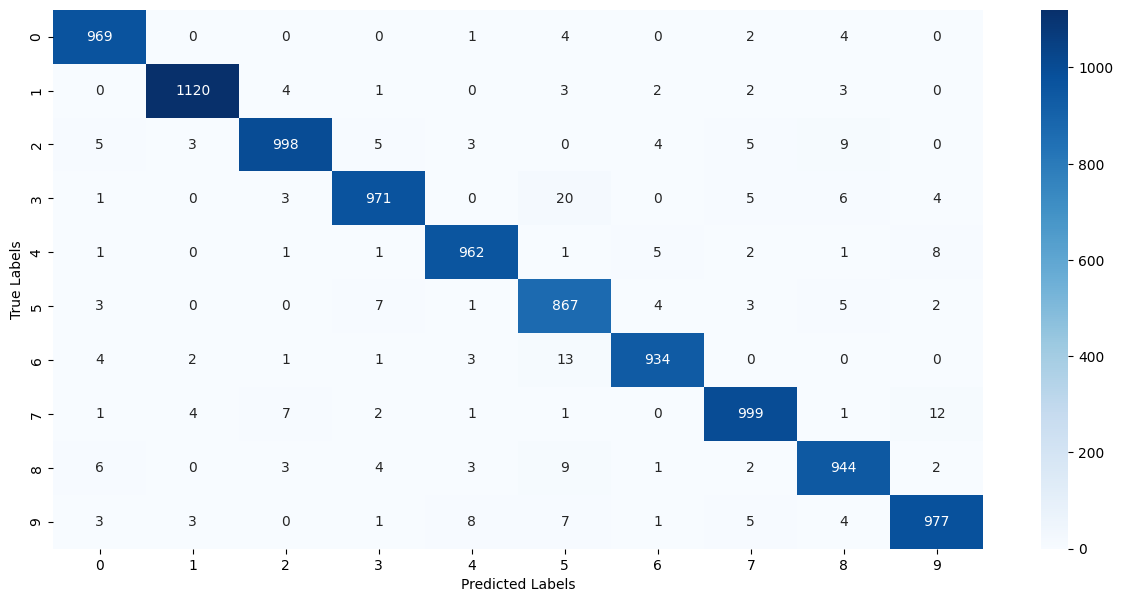

In [52]:
#build a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

In [53]:
#build a predictive system

input_image_path = "/content/MNIST_digit.png"
input_image = cv2.imread(input_image_path)
type(input_image)

numpy.ndarray

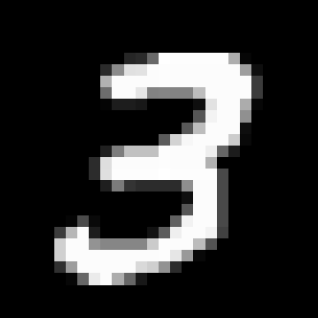

In [54]:
cv2_imshow(input_image)

In [55]:
input_image.shape

(318, 318, 3)

In [56]:
#convert input image to gray scale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(318, 318)

In [57]:
#resize the input image
input_img = cv2.resize(grayscale, (28, 28))
print(input_img.shape)
cv2_imshow(input_img)

(28, 28)


In [58]:
#scale the input
input_img = input_img/255

#reshape image
img_reshaped = np.reshape(input_img, [1, 28, 28])
type(img_reshaped)

numpy.ndarray

In [59]:
input_prediction = model.predict(img_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 25ms/step
[[8.3413606e-06 2.0872935e-08 7.5707358e-04 1.0000000e+00 2.7252549e-18
  8.9450745e-04 2.3315977e-15 1.6885698e-06 2.7874583e-02 7.9599911e-01]]


In [60]:
input_prediction_label = np.argmax(input_prediction)
print(input_prediction_label)

3
